In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [6]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalizing the Data into 0 - 1

In [7]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Seperating the Normal and Abnormal Data 

In [8]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

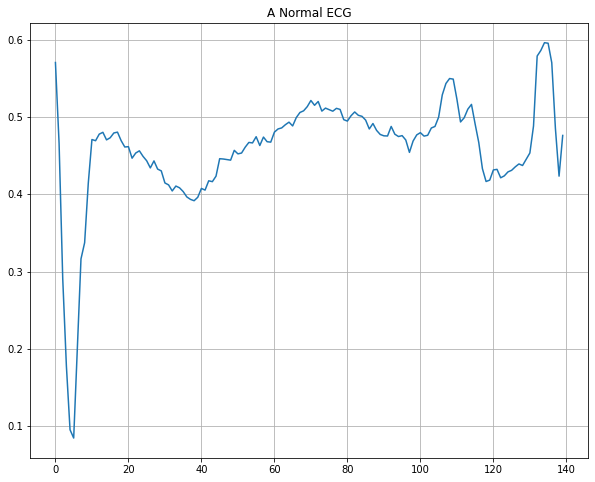

In [12]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

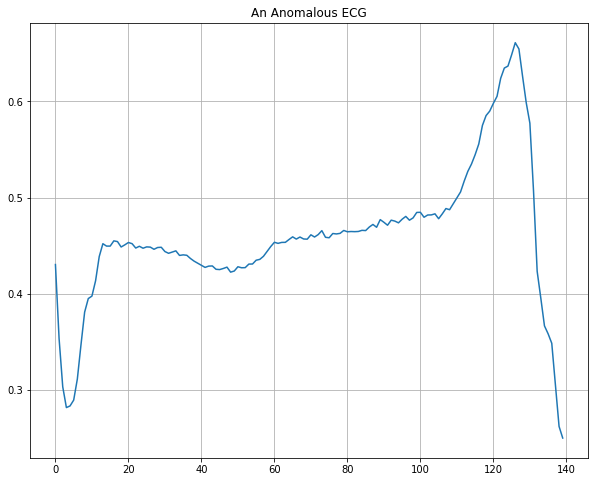

In [17]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

No of Normal ECGs

In [18]:
normal_train_data.shape

TensorShape([2359, 140])

No of Anomal ECGs

In [19]:
anomalous_train_data.shape

TensorShape([1639, 140])

Building the Model 

In [20]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

Uses the Adam Optimization Technique and the Mean Average

In [21]:
autoencoder.compile(optimizer='adam', loss='mae')

In [22]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 2s 115ms/step - loss: 0.0584 - val_loss: 0.0536
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0566 - val_loss: 0.0524
Epoch 3/20
5/5 [==============================] - 0s 24ms/step - loss: 0.0548 - val_loss: 0.0509
Epoch 4/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0525 - val_loss: 0.0493
Epoch 5/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0493 - val_loss: 0.0479
Epoch 6/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0459 - val_loss: 0.0468
Epoch 7/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0427 - val_loss: 0.0448
Epoch 8/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0393 - val_loss: 0.0424
Epoch 9/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0360 - val_loss: 0.0411
Epoch 10/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0330 - val_loss: 0.0397
Epoch 11/20
5/5 [===========

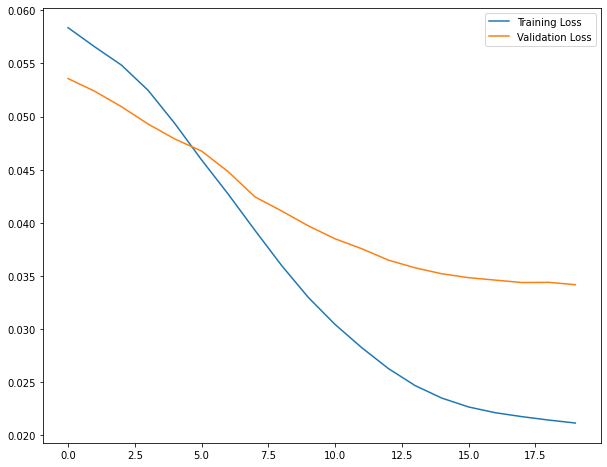

In [23]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

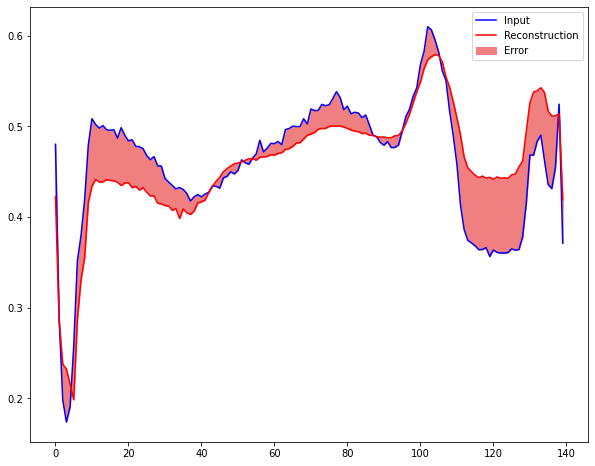

In [24]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

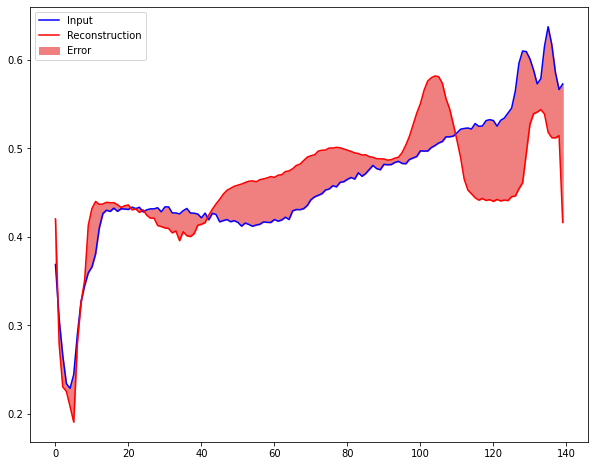

In [25]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

74/74 [==============================] - 0s 1ms/step


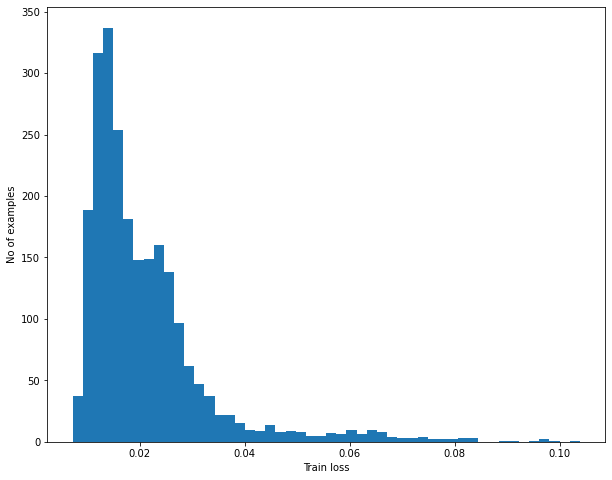

In [26]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

52/52 [==============================] - 0s 1ms/step


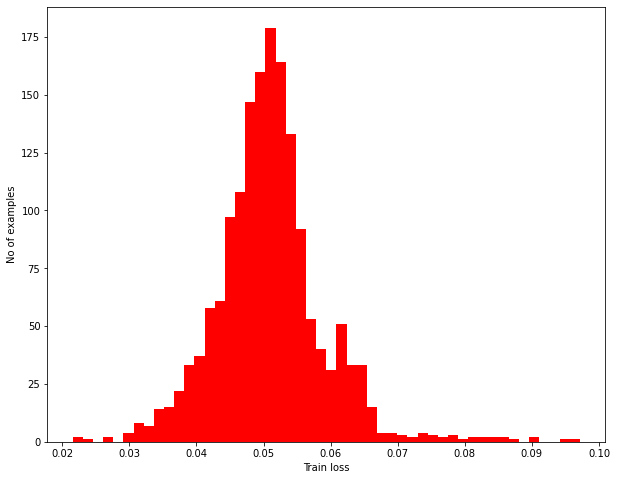

In [29]:
reconstructions1 = autoencoder.predict(anomalous_train_data)
train_loss1 = tf.keras.losses.mae(reconstructions1, anomalous_train_data)

plt.hist(train_loss1[None,:], bins=50, color="red")
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [30]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033326298


14/14 [==============================] - 0s 1ms/step


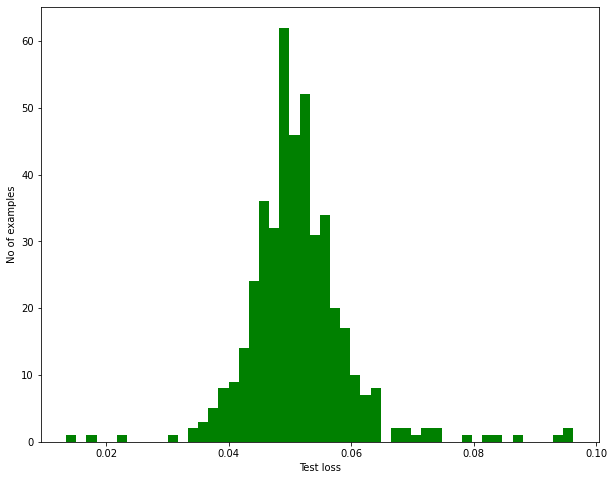

In [31]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50, color="green")
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [47]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  print(tf.math.less(loss, threshold))
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

tf.Tensor(
[False False  True  True False False  True  True False  True False  True
 False  True False  True  True  True False False False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
 False False  True False  True False  True  True  True  True  True False
 False  True  True False False False  True False  True  True False False
 False  True  True False False  True False False  True  True False  True
 False False  True False False  True  True  True  True False False  True
 False  True False False False  True  True False False False  True False
  True False False  True False  True False  True  True  True False  True
 False False  True  True False  True False  True  True False False  True
 False  True  True  True False  True False  True  True False False  True
 False  True False False  True  True  True  True False False False False
 False  True  True  True  True  True False  True  True False  True  True
 False False  True False  True  True  Tr

In [36]:
test_loss[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.04233484>

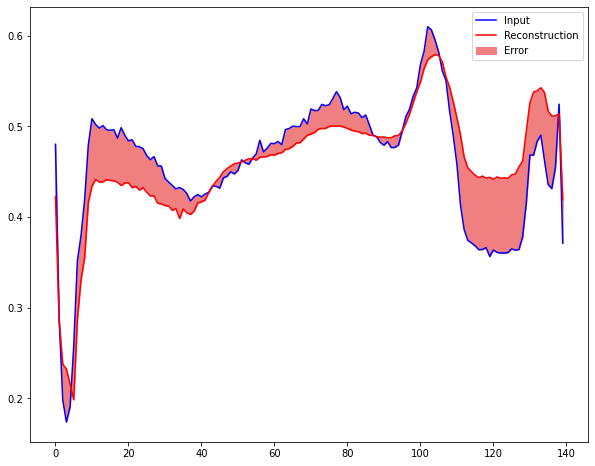

In [38]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
t=